# Wavelets

This page serves as a reference for the different types of wavelets baked into the examples module and provides a recipe for creating your own.

## The Gaussian soliton

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import examples.seismic.source as s

In [2]:
s.gauss

A*exp(-pi**2*f**2*(t - 1/f)**2)

In [3]:
def plot_wavelet(t, data):
    N = t.size
    T = t[-1]
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    fig.tight_layout()
    
    ax[0].plot(t, data)
    ax[0].set_xlim(0, 0.2)
    ax[0].set_ylim(-1.05, 1.05)
    ax[0].set_xlabel('Time t')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Wavelet')
    
    abcissa = sp.fft.fftfreq(N, T/N)
    ax[1].plot(abcissa[:N//2], (1/N)*np.abs(sp.fft.fft(data)[:N//2]))
    ax[1].set_xlim(0, 100)
    ax[1].set_xlabel('Frequency f = 1/t')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Spectrum')

    return fig, ax

In [4]:
f0 = 30
N = 1000
T = 10/f0
gamma = 3
t = np.linspace(0, T, 1001)

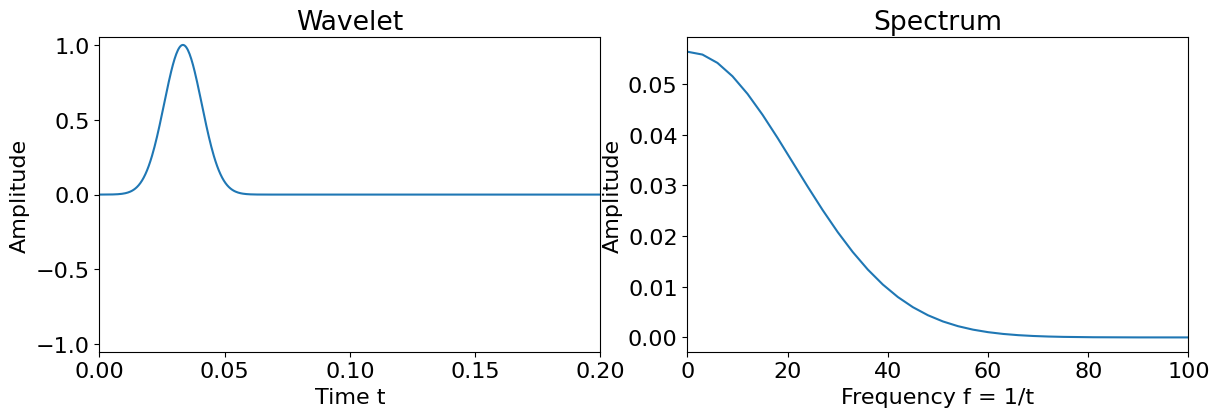

In [5]:
gauss_data = s.wavelet['gauss_soliton'](t, f0)

_ = plot_wavelet(t, gauss_data)

In [6]:
s.ricker

-A*(2*pi**2*f**2*(t - 1/f)**2 - 1)*exp(-pi**2*f**2*(t - 1/f)**2)

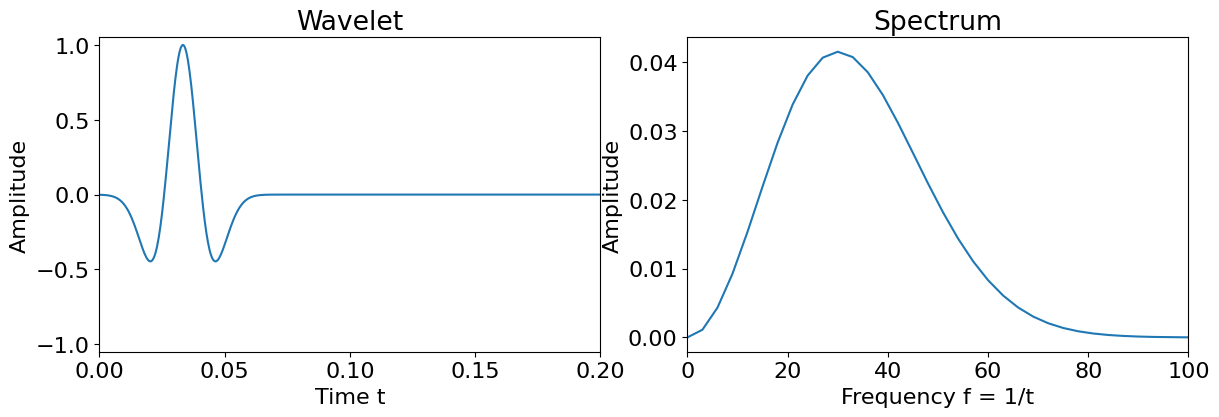

In [7]:
ricker_data = s.wavelet['ricker'](t, f0)

_ = plot_wavelet(t, ricker_data)

In [8]:
s.wavelet['gauss_soliton'](t, f0)
s.wavelet['dgauss'](t, f0)
s.wavelet['ricker'](t, f0)
s.wavelet['gabor'](t, f0, 1, gamma=gamma, phi=np.pi/4)
s.wavelet['gabor'](gamma*t, f0, gamma=gamma, phi=np.pi/4)

array([3.65738157e-05, 3.53821057e-05, 3.03651614e-05, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00], shape=(1001,))

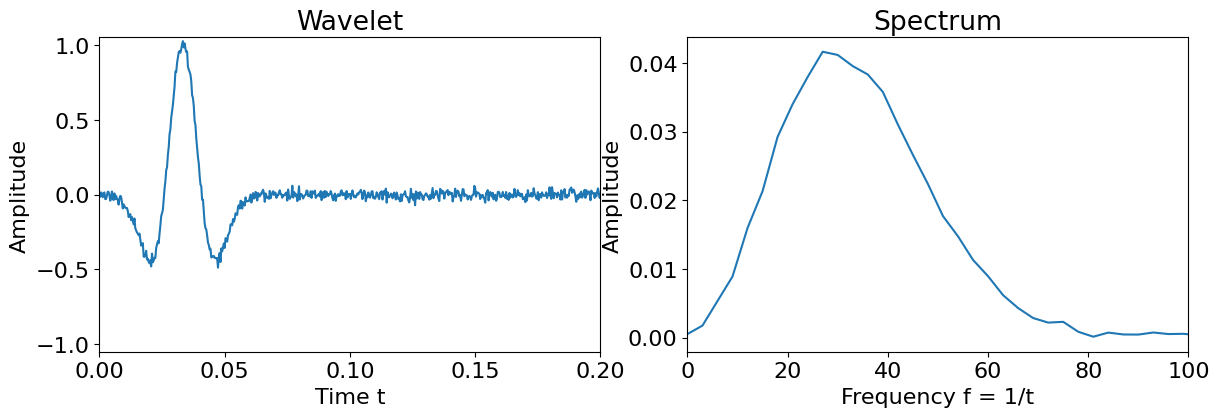

In [9]:
rng = np.random.default_rng(seed=7)
custom_data = s.wavelet['ricker'](t, f0) + np.random.normal(0, 0.02, t.shape)

_ = plot_wavelet(t, custom_data)